# Airbnb Tokyo Analysis
Airbnb provides a platform for hosts to accommodate guests with short-term lodging and tourism-related activities. Guests can search for lodging using filters such as lodging type, dates, location, and price. Guests have the ability to search for specific types of homes, such as bed and breakfasts, unique homes, and vacation homes. Before booking, users must provide personal and payment information. Hosts provide prices and other details for their rental or event listings, such as the allowed number of guests, home type, rules, and amenities. Pricing is determined by the host, with recommendations from Airbnb. Hosts and guests have the ability to leave reviews about the experience. Airbnb acts as a broker, receiving commissions from each booking.

The project aims to analyse which factors are significantly important for the price. 

This notebook follows CRISP-DM (Cross-Industry Standard Process for Data Mining) methodology. The steps wil be as below:

1)Business understanding

2)Data understanding

3)Data preparation

4)Modeling

5)Evaluation

6)Deployment

There are 5 main things we are trying to find from the data:
1. What is the average price of neighbourhoods in Tokyo?
2. What is the average price of a room type in Tokyo neighbourhoods?
3. What percentage of AirBnb accomodations are of each room-type?
4. What is the average price for each room-type?
5. What is the average price of a room type in Tokyo neighbourhoods?

Lastly, we will predict the price of a rental and see how close our prediction is to the actual price.

# Step 1: Data Acquisition

## Importing Packages

In this step, Python libraries (such as panda, numpy, sklearn) that will be used throughtout the project has been imported.



In [352]:
import numpy as np
import pandas as pd
import string 
import seaborn as sns
from datetime import date
import matplotlib.pyplot as plt
%matplotlib inline

from scipy.stats import norm
from scipy import stats
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import ExtraTreesClassifier

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt
from sklearn.metrics import r2_score
sns.set_style('darkgrid')

## Loading Data
The data from kaggle.com had mounted and dataframes had been created.

In [353]:
all_listings = pd.read_csv('AB_TYO_2019.csv')

# Step 2: Data Understanding

* Column Names with their corresponding information(dtype,length,etc.)
* Frame Shape
* Statistical Description of Data Frame
* Simple Plots
* Unique Values to our Data Set

Data understanfing plays an important role in order to prepare the data for further actions.It must be done with an extreme care in order allow further steps to work with a better accuracy.Any major error or misleading data can cause a very chaotic effect.

##Basic information about the Data Frame
This category contains:

* Column Names with their corresponding information(dtype,length,etc)
* Frame Shape

Below code gives us the information about both the column names and their corresponding dtype which plays an important role.Each column must be examined due to the fact that there might be some columns with wrong data format.

In [354]:
print(all_listings.head())
print("Frame Shape:{}".format(all_listings.shape))
all_listings.info()

       id                                               name  host_id  \
0   35303  La Casa Gaienmae C Harajuku, Omotesando is nearby   151977   
1  197677                          Oshiage Holiday Apartment   964081   
2  289597                  Private apt in central Tokyo #203   341577   
3  370759  Cozy flat #203, local area YET 10 mins to shib...  1573631   
4  700253                  Private apt in central Tokyo #201   341577   

             host_name  neighbourhood_group neighbourhood  latitude  \
0               Miyuki                  NaN    Shibuya Ku  35.67152   
1      Yoshimi & Marek                  NaN     Sumida Ku  35.71721   
2             Hide&Kei                  NaN     Nerima Ku  35.74267   
3  Gilles,Mayumi,Taiki                  NaN   Setagaya Ku  35.66344   
4             Hide&Kei                  NaN     Nerima Ku  35.74264   

   longitude        room_type  price  minimum_nights  number_of_reviews  \
0  139.71203     Private room   4196              28       

## Summary Statistics

In [355]:
all_listings.describe()

,id,host_id,neighbourhood_group,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month
count,1.146600e+04,1.146600e+04,0.0,11466.000000,11466.000000,1.146600e+04,11466.000000,11466.000000,9789.000000
mean,2.640545e+07,1.399776e+08,NaN,35.687159,139.734537,1.498470e+04,3.316239,26.028868,2.262540
std,7.565212e+06,8.064289e+07,NaN,0.217853,0.092771,3.327345e+04,7.766766,38.455449,1.744004
min,3.530300e+04,1.519770e+05,NaN,27.072330,139.130020,0.000000e+00,1.000000,0.000000,0.040000
25%,2.215251e+07,5.783171e+07,NaN,35.679620,139.698975,6.026000e+03,1.000000,2.000000,1.000000
50%,2.841873e+07,1.502326e+08,NaN,35.701910,139.729165,1.000700e+04,1.000000,12.000000,2.060000
75%,3.222416e+07,2.135896e+08,NaN,35.724215,139.784270,1.721600e+04,2.000000,32.000000,3.170000
max,3.608660e+07,2.714130e+08,NaN,35.832430,142.202880,1.000046e+06,180.000000,453.000000,51.210000


## Unique Values Corresponding to our Data Set

In [356]:
for e in all_listings[["neighbourhood","neighbourhood_group","room_type","minimum_nights","number_of_reviews"]].columns:
    print("Number of unique values of column ",e," = ",len(all_listings[e].unique()),"\n\nValues : ",all_listings[e].unique(),"\n\n")

Number of unique values of column  neighbourhood  =  56 

Values :  ['Shibuya Ku' 'Sumida Ku' 'Nerima Ku' 'Setagaya Ku' 'Arakawa Ku'
 'Shinjuku Ku' 'Mitaka Shi' 'Adachi Ku' 'Katsushika Ku' 'Meguro Ku'
 'Toshima Ku' 'Minato Ku' 'Shinagawa Ku' 'Suginami Ku' 'Koto Ku'
 'Akishima Shi' 'Bunkyo Ku' 'Taito Ku' 'Itabashi Ku' 'Ota Ku' 'Edogawa Ku'
 'Machida Shi' 'Kita Ku' 'Higashimurayama Shi' 'Nakano Ku' 'Hino Shi'
 'Hachioji Shi' 'Koganei Shi' 'Kokubunji Shi' 'Ogasawara Mura'
 'Musashino Shi' 'Okutama Machi' 'Kodaira Shi' 'Akiruno Shi' 'Chiyoda Ku'
 'Chuo Ku' 'Fuchu Shi' 'Inagi Shi' 'Fussa Shi' 'Tama Shi' 'Nishitokyo Shi'
 'Komae Shi' 'Chofu Shi' 'Hinohara Mura' 'Ome Shi' 'Oshima Machi'
 'Kozushima Mura' 'Higashiyamato Shi' 'Hamura Shi' 'Tachikawa Shi'
 'Musashimurayama Shi' 'Niijima Mura' 'Hachijo Machi' 'Miyake Mura'
 'Kunitachi Shi' 'Higashikurume Shi'] 


Number of unique values of column  neighbourhood_group  =  1 

Values :  [nan] 


Number of unique values of column  room_type  =  3 



# Step 3: Data Preparation

In this step of this notebook,the main focus is on cleaning the data and store the cleaned version.The methods followed for the cleaning the data is stated as below: 
* Drop columns that are not relevant to the problem. Example: id, host_name etc.
* Detect missing values for each column.
* Drop or fill columns if they contain a large proportion of missing values.



It is necessary to first identify the NaN values of the corresponding column.

<h2> Data Cleaning </h2>

In [357]:
all_listings.isnull().sum()

id                         0
name                       0
host_id                    0
host_name                 16
neighbourhood_group    11466
                       ...  
price                      0
minimum_nights             0
number_of_reviews          0
last_review             1677
reviews_per_month       1677
Length: 14, dtype: int64

One other major problem in the data set is that there exists some empty columns with a high proportion of NaN's which needs a decision whether to fill them or drop them.

In [359]:
#drop rows with missing price
all_listings = all_listings.dropna(subset=['price'], axis=0)

In [360]:
pd.set_option('display.max_rows', None)
print("percent of missing values in each coloumn in listings")
display(all_listings.isnull().mean())

percent of missing values in each coloumn in listings


id                     0.000000
name                   0.000000
host_id                0.000000
host_name              0.001395
neighbourhood_group    1.000000
neighbourhood          0.000000
latitude               0.000000
longitude              0.000000
room_type              0.000000
price                  0.000000
minimum_nights         0.000000
number_of_reviews      0.000000
last_review            0.146259
reviews_per_month      0.146259
dtype: float64

In [361]:
all_listings.dtypes
pd.set_option('display.max_rows', 10)

In [362]:
all_listings['price']
all_listings.sort_values(by="price",ascending=False)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month
8694,32369104,Uhome Komagome Apartment 5F6F,73463626,Hara,NaN,Toshima Ku,35.73620,139.74666,Entire home/apt,1000046,1,10,2019-06-07,2.91
1693,17981507,"Uhome Ueno Apartment, 3mins to station.max10pe...",35181469,Rita,NaN,Taito Ku,35.71324,139.77972,Entire home/apt,1000046,1,55,2019-06-23,2.04
3433,23907725,"Uhome Kanda Hotel, one stop to Tokyo sta KD302",73463626,Hara,NaN,Chiyoda Ku,35.69423,139.77322,Entire home/apt,1000046,1,44,2019-06-21,2.91
3435,23907817,"Uhome Kanda Hotel, one stop to Tokyo sta. KD502",73463626,Hara,NaN,Chiyoda Ku,35.69277,139.77302,Entire home/apt,1000046,1,14,2019-05-27,0.96
936,13584129,"Uhome Shinjuku Villa, 8min to Shinjuku",35181469,Rita,NaN,Nakano Ku,35.69622,139.68470,Entire home/apt,1000046,1,80,2019-06-16,2.18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9733,33591230,SHIBUYA STATION 8mins,178319983,Yukari,NaN,Shibuya Ku,35.65539,139.70995,Entire home/apt,1076,3,0,NaN,NaN
2512,21234998,【NEW SALE!!】Asakusa Japanese style room#204,150357703,Makoto,NaN,Sumida Ku,35.70534,139.79748,Private room,0,1,6,2019-03-24,0.33
2511,21234860,【NEW SALE!!】Asakusa Japanese style room#203,150357703,Makoto,NaN,Sumida Ku,35.70550,139.79741,Private room,0,1,7,2019-03-25,0.38
2236,20659571,Takahata Apartment 118,13088224,Rickie,NaN,Hino Shi,35.66414,139.40825,Entire home/apt,0,30,15,2019-02-09,0.70


##Skewness Of Numerical Data

Since in the further steps we plan to implement ML algorithms for price we can decrease the skewness of our data.

Text(0.5, 1.0, 'Data Distribuition')

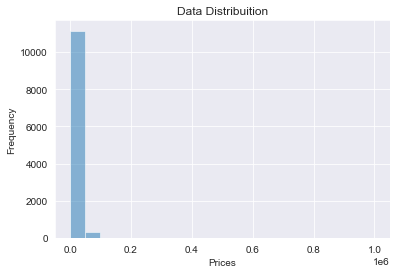

In [363]:
#histogram of price
ax = all_listings['price'].plot.hist(bins=20,alpha=0.5)
plt.xlabel("Prices")
plt.title("Data Distribuition")

Here it can be observed that there is a right skewed distribution exists on price which states us that there is a positive skewness.This condition can be fixed by using logarithmic transformation and since division by zero is a problem we can use log+1.

In [364]:
all_listings['price_log'] = np.log(all_listings.price+1)

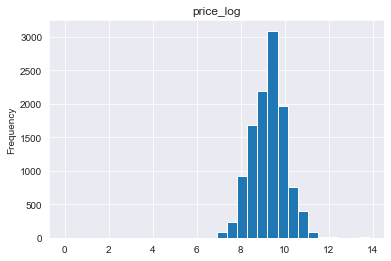

In [365]:
plt.hist(all_listings["price_log"], bins=30)
plt.ylabel("Frequency")
plt.title("price_log")

plt.show()

Drop prices not between the 5-95% quantile

In [366]:
print(all_listings.describe().price_log)

len_before = len(all_listings)
all_listings = all_listings[all_listings['price_log'].between(all_listings['price_log'].quantile(.05), all_listings['price_log'].quantile(.95))]
len_after = len(all_listings)
print(all_listings.describe().price_log)
print("we dropped "+str(len_before-len_after)+" rows")

count    11466.000000
mean         9.251507
std          0.796755
min          0.000000
25%          8.704005
50%          9.211140
75%          9.753653
max         13.815558
Name: price_log, dtype: float64
count    10445.000000
mean         9.233233
std          0.616284
min          8.011023
25%          8.772920
50%          9.211140
75%          9.682467
max         10.519106
Name: price_log, dtype: float64
we dropped 1021 rows


Text(0.5, 1.0, 'Data Distribuition after dropping outliers')

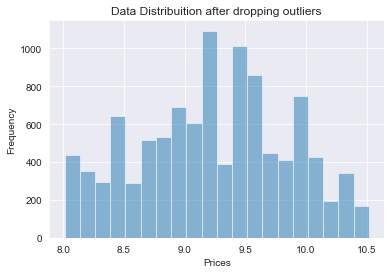

In [367]:
#histogram of price
ax = all_listings['price_log'].plot.hist(bins=20,alpha=0.5)
plt.xlabel("Prices")
plt.title("Data Distribuition after dropping outliers")

## Drop columns

Before starting to manipulate the missing values,unnecessary columns can be dropped in order to gain a better view for what to do for missing values.
* As it can be observed , "id" column shows no importance to us since there exists no correlation between "id" column and other columns.
* It is also can be stated that "host_name" shows no importance for us and more importantly for ethical reasons such as preserving the privacy of the hosts it is better to drop.
* Column "last_review" must be dropped since almost 20% of the data is missing and also shows no correlative effect in the dataset for further operations.


In [368]:
print(all_listings.columns)
listings = all_listings.drop(['id', 'name', 'host_name', 'host_id','last_review'],axis = 1)

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'price_log'],
      dtype='object')


##Missing Value Handling

After dropping columns we have a clear route in order to decide what to do with missing values.

Missing Value Percentage

In [369]:
total = listings.isnull().sum().sort_values(ascending = False)[listings.isnull().sum().sort_values(ascending = False) != 0]
percent = round(listings.isnull().sum().sort_values(ascending = False)/len(listings)*100,2)[round(listings.isnull().sum().sort_values(ascending = False)/len(listings)*100,2) != 0]
pd.concat([total, percent], axis=1, keys=['Total','Percent'])

,Total,Percent
neighbourhood_group,10445,100.00
reviews_per_month,1492,14.28


In [370]:
mean = listings['reviews_per_month'].mean()
listings['reviews_per_month'].fillna(mean, inplace=True)
listings.isnull().sum()

neighbourhood_group    10445
neighbourhood              0
latitude                   0
longitude                  0
room_type                  0
price                      0
minimum_nights             0
number_of_reviews          0
reviews_per_month          0
price_log                  0
dtype: int64

We choose to fill the missing values of "*reviews_per_month*" by the mean of that column.It necessary to remember the difference that we have done in this cell since any unexpected outcome might be caused by this change.



There might still be some missing values which we haven't considered so a search will be done in order to check.

In [371]:
total = listings.isnull().sum().sort_values(ascending = False)[listings.isnull().sum().sort_values(ascending = False) != 0]
percent = round(listings.isnull().sum().sort_values(ascending = False)/len(listings)*100,2)[round(listings.isnull().sum().sort_values(ascending = False)/len(listings)*100,2) != 0]
pd.concat([total, percent], axis=1, keys=['Total','Percent'])

,Total,Percent
neighbourhood_group,10445,100.0


## Checking for absurd values
The data set had 3 numeric columns written with float64, 7 with int64 , and after dropping the irrelevant columns, there were 2 float64 and 6 int64 columns.It is necessary to check these columns for any absurd instances.Example: minimum_nights column containing a negative value.

In [372]:
#Calculation of the rows which column value is 0 
print("Number of rows where (minimum_nights <= 0) :",listings[listings["minimum_nights"] <= 0].shape[0])
print("Number of rows where (number_of_reviews <= 0) :",listings[listings["number_of_reviews"] <= 0].shape[0])


Number of rows where (minimum_nights <= 0) : 0
Number of rows where (number_of_reviews <= 0) : 1492


As we can see above "*minimum_nights*" does not contain any negative values or 0's but we can't say the same about "*number_of_reviews*"  and "*price*" columns.

A more detailed examination can be conducted for columns came up with a value smaller equals to 0 by only removing the equality symbol that existed in the code above.

In [373]:
print("Number of rows where (number_of_reviews < 0) :",listings[listings["number_of_reviews"] < 0].shape[0])

Number of rows where (number_of_reviews < 0) : 0


There are no rows with negative values that affects the accuracy of our dataset but the instances that is equal to 0 must be examined.

It is not a problematic result to have "*number_of_reviews*" that equals to 0 which can be explained as the host has never been visited by an user.

# Step 4: Explanatory Data Analysis Visualization

In this step, possible unknown relations are searched.If any existing relation discovered, it will be used in further steps.

## Price Related Data Visualization

Text(0.5, 1.0, 'Correlation Matrix')

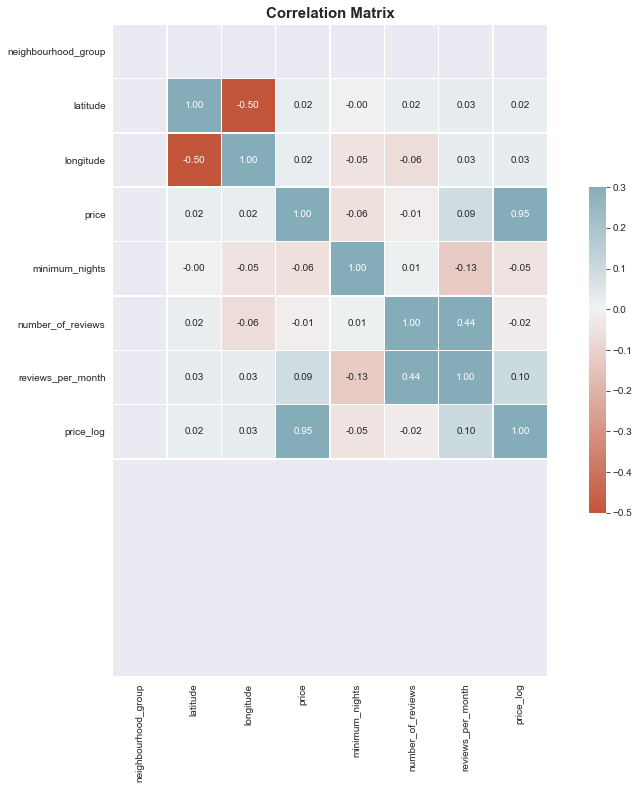

In [374]:
plt.figure(figsize=(15,12))
palette = sns.diverging_palette(20, 220, n=256)
corr=listings.corr(method='pearson')
sns.heatmap(corr, annot=True, fmt=".2f", cmap=palette, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}).set(ylim=(12, 0))
plt.title("Correlation Matrix",size=15, weight='bold')

In [375]:
listings['price'].groupby(listings["room_type"]).describe().round(2)

,count,mean,std,min,25%,50%,75%,max
room_type,,,,,,,,
Entire home/apt,6945.0,14116.50,7369.47,3013.0,8823.0,12051.0,17969.0,37015.0
Private room,2743.0,9576.50,6150.04,3013.0,4950.0,7532.0,12051.0,37015.0
Shared room,757.0,5104.38,4116.29,3013.0,3013.0,3551.0,4950.0,30021.0


(0 = Entire home/apt, 1 = Private room, 2 = Shared room)


Entire home/apt is the most expensive room type with average price 14116.50.

Shared Room is the less expansive room type with price 5104.38.

In [376]:
#separate listings features into categorical and quantitative
cat_df = listings.select_dtypes(include=['object'])
quant_df = listings.select_dtypes(include=['float64','int64'])


In [377]:
#some coloumns have t,f for true and false, and I want to change them to boolean
for col in cat_df:
    if(len(cat_df[col].unique())<=3):
      unique_vals = sorted(cat_df[col].unique())
      if unique_vals[0] == 'f':
        cat_df[col] = cat_df[col].apply(lambda val: True if val=='t' else False)

In [378]:
#reorganize the coloumns
quant_cols = quant_df.columns.tolist()
price_index = quant_cols.index('price')
#print(price_index) 
quant_cols = quant_cols[price_index+1:] + quant_cols[:price_index+1]
#print(quant_cols)
quant_df = quant_df[quant_cols]

<AxesSubplot:>

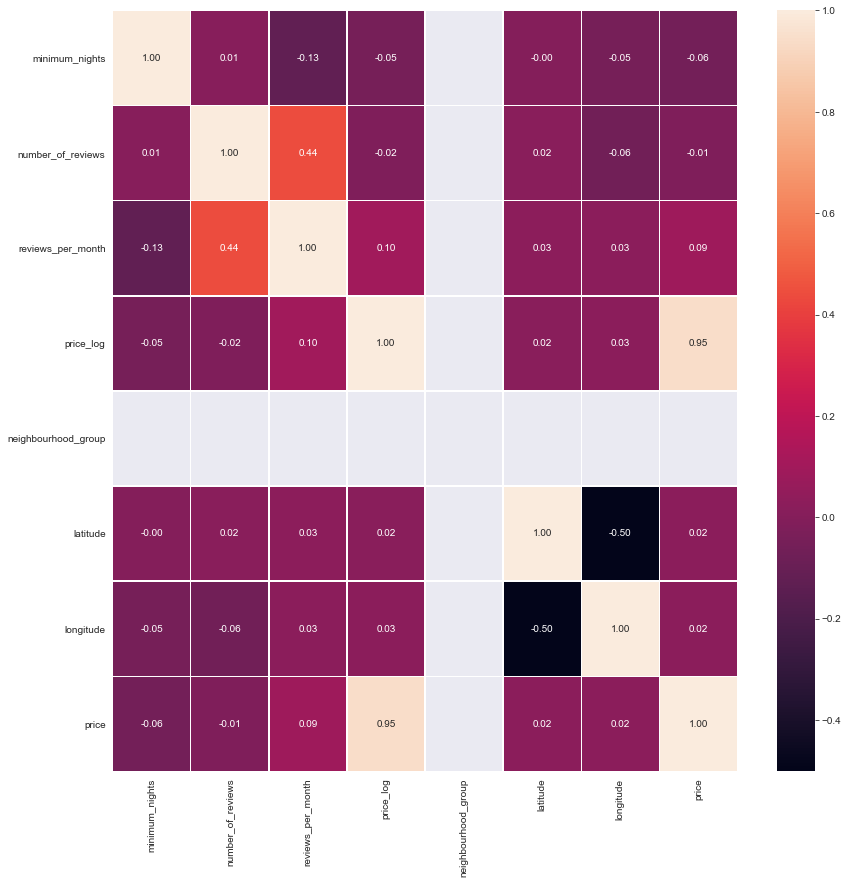

In [379]:
# with the quantitative variables plot a heat map to identify how are variable correlated
fig, ax = plt.subplots(figsize=(14,14))         # Sample figsize in inches
sns.heatmap(quant_df.corr(),annot=True,fmt=".2f",linewidths=.5, ax=ax)

We see some positive correlation between 'price' and 'reviews_per_month'

In [380]:
cat_df_cols = list(cat_df.columns)
print("The categorical features are ")
print(cat_df.columns)
print("Length of cat_df is "+str(len(cat_df_cols)))

The categorical features are 
Index(['neighbourhood', 'room_type'], dtype='object')
Length of cat_df is 2


In [381]:
quant_df.head()
quant_df_cols = list(quant_df.columns)
print("The quant features are ")
print(quant_df.columns)
print("Length of quant_df is "+str(len(quant_df_cols)))

The quant features are 
Index(['minimum_nights', 'number_of_reviews', 'reviews_per_month', 'price_log',
       'neighbourhood_group', 'latitude', 'longitude', 'price'],
      dtype='object')
Length of quant_df is 8


<h3>A walk through Tokyo's neighborhoods</h3>

Answering the question: Which neighborhoods have the highest and lowest prices and why?

Plot the average price per neighbourhood and order it from lowest to highest

Text(0.5, 1.0, 'Average prices per neighbourhood')

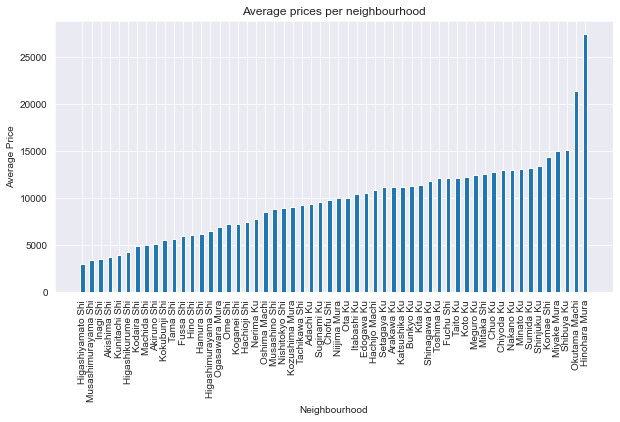

In [382]:
#average neighbourhood prices
neighbourhood_df = pd.DataFrame({'neighbourhood':cat_df['neighbourhood'],'price':quant_df['price']})
average_price_in_neighbourhood = neighbourhood_df.groupby('neighbourhood').mean().reset_index()
average_price_in_neighbourhood = average_price_in_neighbourhood.sort_values(by=['price'])
orderd_neighbourhoods = average_price_in_neighbourhood['neighbourhood'] #to be used in next cell
plt.figure(1,(10,5))
plt.bar(average_price_in_neighbourhood['neighbourhood'],average_price_in_neighbourhood['price'],width = 0.5);
plt.xlabel("Neighbourhood")
plt.ylabel("Average Price")
plt.xticks(rotation=90);
plt.title("Average prices per neighbourhood")

<h4>What is the average price of neighbourhoods in Tokyo?</h4>
From the above graph we can see that Higashiyamato Shi has the lowest prices and Hinohara Mura has the highest prices




Plot the neighbourhood vs average price for different room types and sort them the same way as before

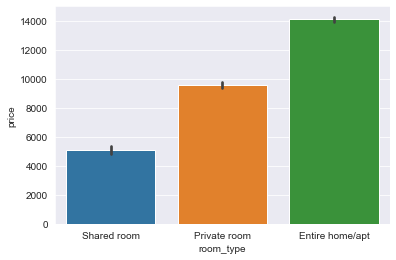

In [387]:
#room_type-price
result = listings.groupby(["room_type"])['price'].aggregate(np.median).reset_index().sort_values('price')
sns.barplot(x='room_type', y="price", data=listings, order=result['room_type']) 
plt.show()

<h4>What is the average price for each room-type?</h4>
The average price for Shared room is around 5000, Private room is around 9500 and for entire homes is about 14000.




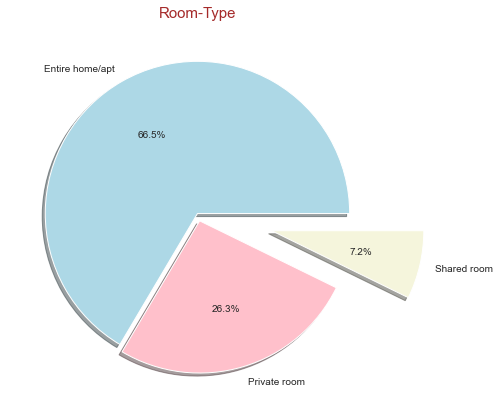

In [410]:
labels = listings.room_type.value_counts().index
colors = ['lightblue','pink','beige']
explode = [0,0,0]
sizes = listings.room_type.value_counts().values


plt.figure(0,figsize = (7,7))
plt.pie(sizes, explode=[0,0.05,0.5], labels=labels, colors=colors, autopct='%1.1f%%', shadow=True)
# plot.pie(explode=,autopct='%1.1f%%',ax=ax[0],)
plt.title('Room-Type',color = 'Brown',fontsize = 15)
plt.show()

<h4>What percentage of AirBnb accomodations are of each room-type?</h4>
Entire home/apt- 66.5%
Private room - 26.3%
Shared room - 7.2%



Still the plot has a lot of information, let's plot every property type separetly

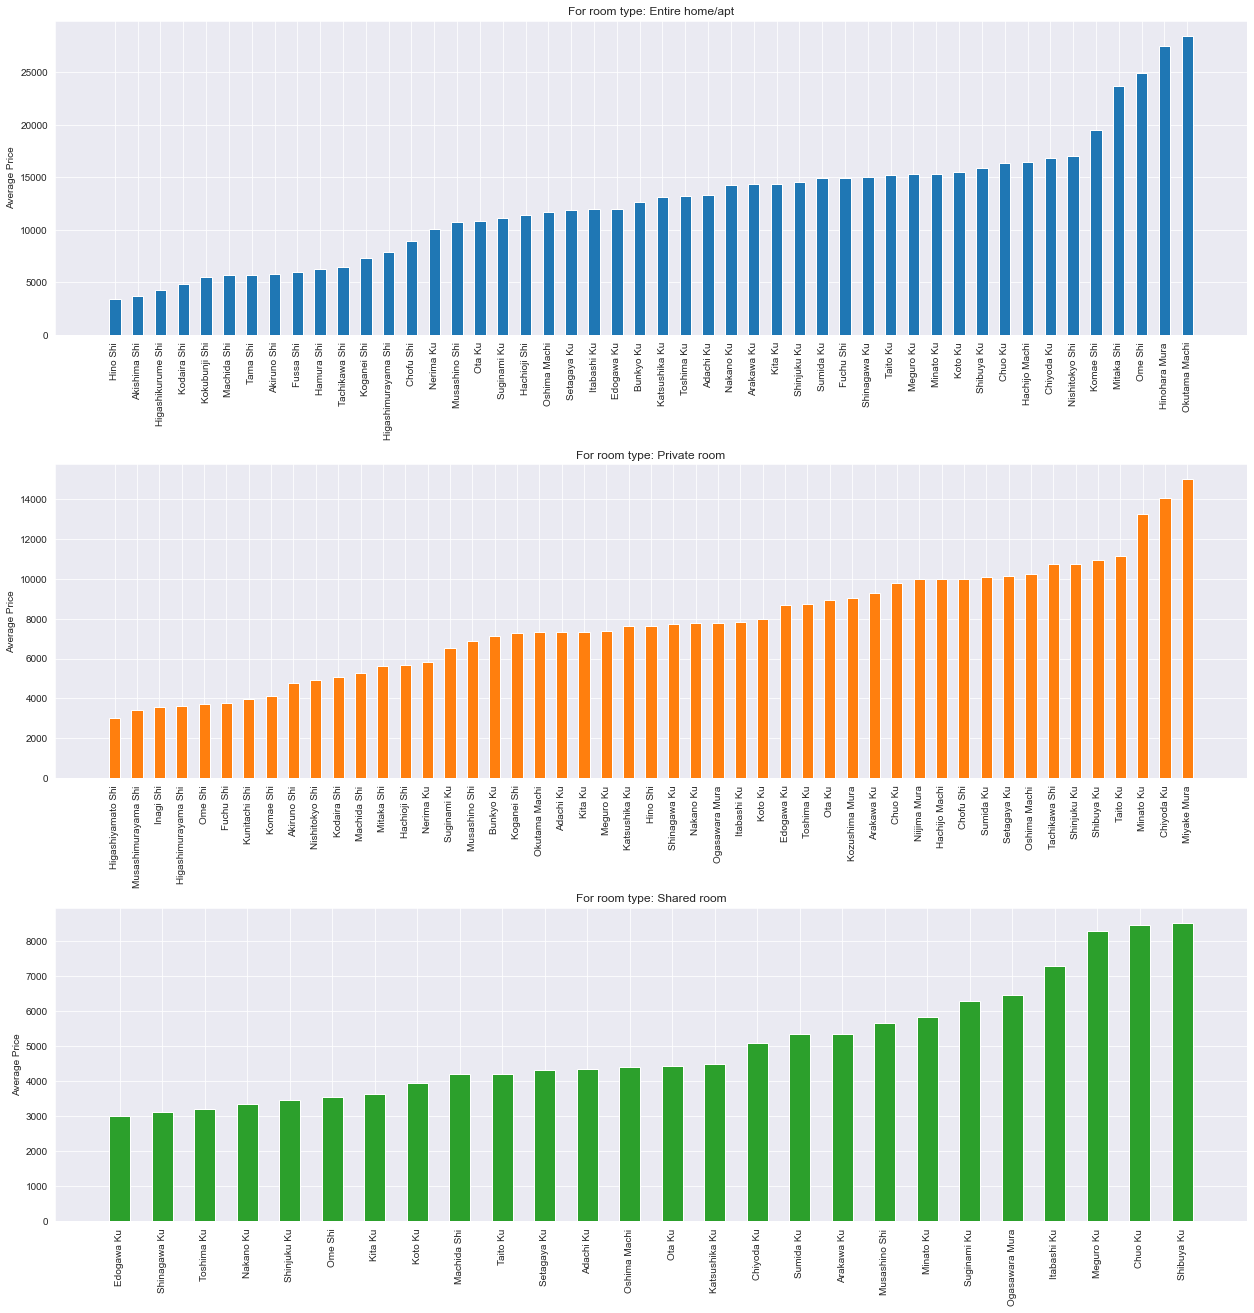

In [412]:
# plot different bar plots for each room type and the neighbourhood 
# and sort the average prices

fig, axs = plt.subplots(3, 1,figsize=(20,20))
fig.tight_layout(pad=11)
for i,room in enumerate(labels):
  room_type_df = average_price_neighbour_rmtype[average_price_neighbour_rmtype['room_type']==room]
  average_price_in_room_type_df = room_type_df.groupby('neighbourhood').mean().reset_index()
  average_price_in_room_type_df = average_price_in_room_type_df.sort_values(by=['price'])
  plt.sca(axs[i%3])
  if len(np.unique(average_price_in_room_type_df['neighbourhood']))>10:
    barWidth = 0.01
  else:
    barwidth = 0.1
  axs[i%3].bar(average_price_in_room_type_df['neighbourhood'],average_price_in_room_type_df['price'],width = 0.5,color=colors[i]);

  plt.ylabel("Average Price")
  plt.title("For room type: "+room)
  plt.xticks(rotation=90);

<h4>What is the average price of a room type in Tokyo neighbourhoods?</h4>
The above charts shows average price of each neighbourhood with respect to the room type.

Text(0.5, 1.0, 'Most reviewed places')

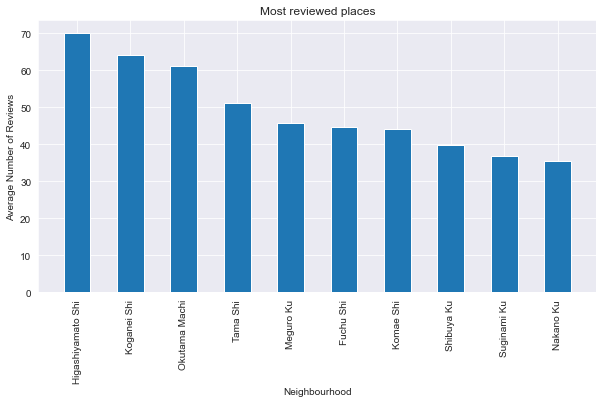

In [385]:
#most reviewed spots
neighbourhood_df = pd.DataFrame({'neighbourhood':cat_df['neighbourhood'],'number_of_reviews':quant_df['number_of_reviews']})
average_price_in_neighbourhood = neighbourhood_df.groupby('neighbourhood').mean().reset_index()
average_price_in_neighbourhood = average_price_in_neighbourhood.sort_values(by=['number_of_reviews'], ascending=False)[:10]
orderd_neighbourhoods = average_price_in_neighbourhood['neighbourhood'] #to be used in next cell
plt.figure(1,(10,5))
plt.bar(average_price_in_neighbourhood['neighbourhood'],average_price_in_neighbourhood['number_of_reviews'],width = 0.5);
plt.xlabel("Neighbourhood")
plt.ylabel("Average Number of Reviews")
plt.xticks(rotation=90);
plt.title("Most reviewed places")

<h4>What is the most reviewed neighbourhoods?</h4>
Higashiyamato Shi is among the most reviewed places

# Step 5: Modelling Data 


In this step,what we are basically trying to achieve is to select an efficient multivariate ML algorithm which would predict the price with feature sensitively.Why we are choosing such an algorithm is that there are a lot of different parameters which shows importance while obtaining the price such as location, room type, closeness to any public transport.

Repeats for every model:
* Data set to be splitted properly
* Implementation of model
* Hyper Tuning Of Models
<br>
<br>
Here is a graph which could help us to gain an idea about what to do.


So before starting blindly, lets use our observations in order to answer these two questions below.
* What is our problem?
  * We want to predict prices.
  * We want to perform a data modeling from information we gathered in order be used for predicting or decision making.
  * Our problem is that our dataset does not show any linear correlation between two features where one of them is price.
  * The problem occurs due to the fact that important features in our data that would create a correlation with price can only be used together.
    * We can not use "*latitude*" and "*longitude*" separetly in order to derive a statistical result.
* What possible ML algorithms can give a solution to our problem ? 
  * It is possible to answer this question with a lot of different approaches.
      * First of all, after examining the decision map above we know that our problem can be solved using regression, not classification.
      * We can use the regression based ML models for evaluating a better price predicting model but it is necessary to choose the one that shows the best performance.


##Feature Selection and Grid Search

The neighbourhood_group, latitude, longitude column prevents us to apply model functions of Machine Learning Algorithms so we are going to drop it.

In [392]:
df = listings.drop(columns=["neighbourhood_group", "latitude", "longitude"])

In [394]:
# Before starting there exists an easy procedure for mapping categorical values since they are not ordinal.


df['neighbourhood'] = df['neighbourhood'].astype("category").cat.codes
df['room_type'] =df['room_type'].astype("category").cat.codes
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10445 entries, 0 to 11465
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   neighbourhood      10445 non-null  int8   
 1   room_type          10445 non-null  int8   
 2   price              10445 non-null  int64  
 3   minimum_nights     10445 non-null  int64  
 4   number_of_reviews  10445 non-null  int64  
 5   reviews_per_month  10445 non-null  float64
 6   price_log          10445 non-null  float64
dtypes: float64(2), int64(3), int8(2)
memory usage: 768.0 KB


One other major problem is to select appropiate sizes of x and y values from the data set.The data set would be handled as numpy arrays which would satisfy the necessary size limits.

In [395]:
df_model_x, df_model_y = df.iloc[:,:-1], df.iloc[:,-1]

We will split the data with necessary sizes by applying "train_test_split".

In [396]:
X_train, X_test, y_train, y_test = train_test_split(df_model_x, df_model_y, test_size=0.3,random_state=42)

Extremely Randomized Trees Classifier(Extra Trees Classifier) is a type of ensemble learning technique which aggregates the results of multiple de-correlated decision trees collected in a “forest” to output it’s classification result. In concept, it is very similar to a Random Forest Classifier and only differs from it in the manner of construction of the decision trees in the forest.

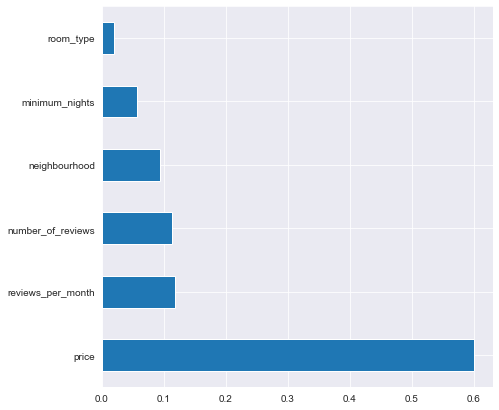

In [397]:
lab_enc = preprocessing.LabelEncoder()

feature_model = ExtraTreesClassifier(n_estimators=50)
feature_model.fit(X_train,lab_enc.fit_transform(y_train))

plt.figure(figsize=(7,7))
feat_importances = pd.Series(feature_model.feature_importances_, index=df.iloc[:,:-1].columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

## Model Building

After examining the table given by sklearn we have decided to implement 4 Machine Learning Models and observe their behaviour after the implementation in order to find an efficient way to tune it.

We have defined grid searching instances as functions in order to call them later.

###Linear Regression Grid Search Cross Validation

The main goal is to discover the best applicable parameter grid in order build a better model.

In [406]:
def linear_reg(x, y, cv=5):
    """
        Model Linear Regression
        Input: Dataset and a cross-validation generator
        
        It implements linear search along with Grid Search Cross Validation
    """
    
    modelLR= LinearRegression()

    parameters = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}

    
    GridSearchLR = GridSearchCV(estimator=modelLR,param_grid=parameters,scoring='neg_mean_squared_error',cv=cv,n_jobs=-1)


    GridSearchLR.fit(x, y)
    BestParametersLR = GridSearchLR.best_params_  
    BestScoreLR = GridSearchLR.best_score_ 
    print("Best Parameter for Linear Regression:{}".format(BestParametersLR))
    print("Best Score for Linear Regression with parameters:{}".format(BestScoreLR))

linear_reg(df_model_x, df_model_y)

Best Parameter for Linear Regression:{'copy_X': True, 'fit_intercept': True, 'normalize': True}
Best Score for Linear Regression with parameters:-0.03293719114655493


###Ridge Regression Grid Search Cross Validation

In [399]:
def ridge_reg(x,y, cv=5):
    """
        Ridge Regression
        Input: Dataset and a cross-validation generator
        
        It implements Ridge Regression Grid Search Cross Validation
    """

    modelRidge= Ridge()

    alphas = np.array([1,0.1,0.01,0.001,0.0001,0])
    normalizes= ([True,False])

    GridSearchRidge = GridSearchCV(estimator=modelRidge,param_grid=(dict(alpha=alphas, normalize= normalizes)),scoring='neg_mean_squared_error',cv=cv,n_jobs=-1)

    ## The best applying parameters are discovered

    GridSearchRidge.fit(x, y)
    BestParametersRidge = GridSearchRidge.best_params_  
    BestScoreRidge = GridSearchRidge.best_score_ 
    print("Best Parameters for Ridge Regression:{}".format(BestParametersRidge))
    print("Best Score for Ridge Regression:{}".format(BestScoreRidge))
    
ridge_reg(df_model_x, df_model_y)

Best Parameters for Ridge Regression:{'alpha': 1.0, 'normalize': False}
Best Score for Ridge Regression:-0.032936851780591136


### Lasso Regression Grid Search Cross Validation

It is known that Lasso Regression performs some extra process in order to evaluate a better model.We are not using this algorithm by fully knowing its abilities since some of these algorithms shows very extreme abilities.Our main goal is to perform the specified grid search algorithm in order to find an optimal way to use it. 

In [400]:
### Lasso Regression ###

def lasso_reg(x, y, cv=5):
     """
        Lasso Regression
        Input: Dataset and a cross-validation generator
        
        It implements Lasso Regression Grid Search Cross Validation
    """
    ## Defining parameters
    modelLasso= Lasso()

    # prepare a range of alpha values to test
    alphas = np.array([1,0.1,0.01,0.001,0.0001,0])
    normalizes= ([True,False])

    ## Building Grid Search algorithm with cross-validation and Mean Squared Error score.

    GridSearchLasso = GridSearchCV(estimator=modelLasso,param_grid=(dict(alpha=alphas, normalize= normalizes)),scoring='neg_mean_squared_error', cv=cv,n_jobs=-1)

    ## Lastly, finding the best parameters.

    GridSearchLasso.fit(x, y)
    BestParametersLasso = GridSearchLasso.best_params_  
    BestScoreLasso = GridSearchLasso.best_score_ 
    print("Best Parameters for Lasso Regression:{}".format(BestParametersLasso))
    print("Best Score for Lasso Regression:{}".format(BestScoreLasso))

lasso_reg(df_model_x, df_model_y)

Best Parameters for Lasso Regression:{'alpha': 0.001, 'normalize': False}
Best Score for Lasso Regression:-0.03291500913579713


###ElasticNet Regression Grid Search Cross Validation

In [407]:
### ElasticNet Regression ###

def elastic_reg(x, y,cv=5):
    """
        ElasticNet Regression
        Input: Dataset and a cross-validation generator
        
        It implements ElasticNet Regression Grid Search Cross Validation
    """
    ## Defining parameters
    modelElastic= ElasticNet()

    # prepare a range of alpha values to test
    alphas = np.array([1,0.1,0.01,0.001,0.0001,0])
    normalizes= ([True,False])

    ## Building Grid Search algorithm with cross-validation and Mean Squared Error score.

    GridSearchElastic = GridSearchCV(estimator=modelElastic,param_grid=(dict(alpha=alphas, normalize= normalizes)),scoring='neg_mean_squared_error',cv=cv,n_jobs=-1)

    ## Lastly, finding the best parameters.

    GridSearchElastic.fit(x, y)
    BestParameterElastic = GridSearchElastic.best_params_  
    BestScoreElastic = GridSearchElastic.best_score_ 
    print("Best Parameters for ElasticNet Regression:{}".format(BestParameterElastic))
    print("Best Score for ElasticNet Regression:{}".format(BestScoreElastic))

elastic_reg(df_model_x, df_model_y)

Best Parameters for ElasticNet Regression:{'alpha': 0.001, 'normalize': False}
Best Score for ElasticNet Regression:-0.03292318019565272


In regression results, if the correlation coefficient is negative, it provides statistical evidence of a negative relationship between the variables. The increase in the first variable will cause the decrease in the second variable. We'll go back to have a look at literature review to possible explanations and rationales

Polynomial Features

In [402]:
Poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_train = Poly.fit_transform(X_train)
X_test = Poly.fit_transform(X_test)

Prediction

In [403]:
##Linear Regression
lr = LinearRegression(copy_X= True, fit_intercept = True, normalize = True)
lr.fit(X_train, y_train)
lr_pred= lr.predict(X_test)

#Ridge Model
ridge_model = Ridge(alpha = 0.01, normalize = True)
ridge_model.fit(X_train, y_train)             
pred_ridge = ridge_model.predict(X_test) 

#Lasso Model
Lasso_model = Lasso(alpha = 0.001, normalize =False)
Lasso_model.fit(X_train, y_train)
pred_Lasso = Lasso_model.predict(X_test) 

#ElasticNet Model
model_enet = ElasticNet(alpha = 0.01, normalize=False)
model_enet.fit(X_train, y_train) 
pred_test_enet= model_enet.predict(X_test)

Polynomial Features

In [409]:
def FeatureComparison(model, pred):
    """
    Input: Model Name and model
    Output: Various metrices
    This function compares various models
    """
    print(model)
    print('MAE: %f' % mean_absolute_error(y_test, pred))
    print('RMSE: %f' % np.sqrt(mean_squared_error(y_test, pred)))
    print('R2 %f' % r2_score(y_test, pred))
    
FeatureComparison('Linear Regression Performance Metrics', lr_pred)
FeatureComparison('Ridge Regression Performance Metrics', pred_ridge)
FeatureComparison('Lasso Regression Performance Metrics', pred_Lasso)
FeatureComparison('ElasticNet Regression Performance Metrics', pred_test_enet)

Linear Regression Performance Metrics
MAE: 0.123092
RMSE: 0.157113
R2 0.935539
Ridge Regression Performance Metrics
MAE: 0.124096
RMSE: 0.158122
R2 0.934709
Lasso Regression Performance Metrics
MAE: 0.123515
RMSE: 0.157245
R2 0.935431
ElasticNet Regression Performance Metrics
MAE: 0.126625
RMSE: 0.160494
R2 0.932735


From the current observation we have done all of the regression models showed performance close to each other causing a confusion in order to decide and choose a better algorithm for further operations. All the regression model have a reduced error rate and and improved R2 Score